### Gradin

In [ ]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

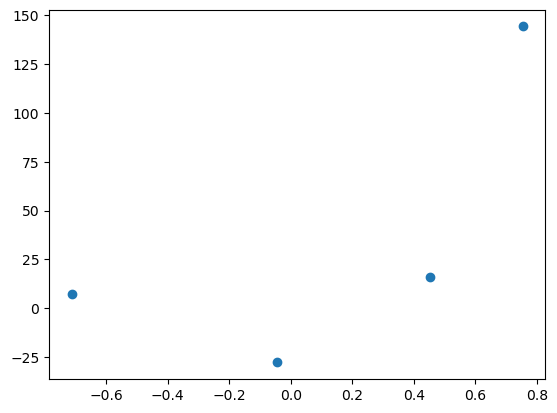

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [4]:
# let's apply 0LS
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()
# reg.fit(X, y)

In [6]:
reg.fit(X, y)

LinearRegression()

In [7]:
reg.coef_

array([78.35063668])

In [8]:
reg.intercept_

26.15963284313262

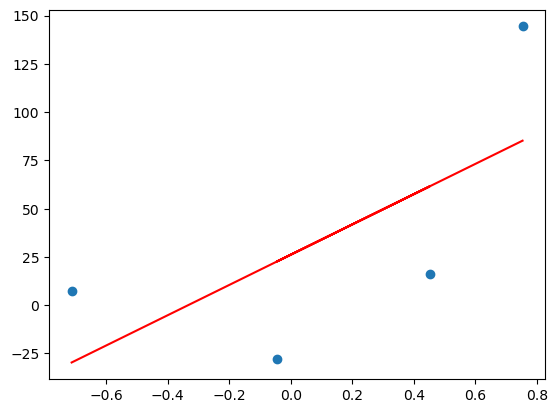

In [9]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')

In [10]:
# let's apply Gradient Desent assuming slope is constant, m = 78.35
# and let's assume the starting value for intercept b=0
y_pred = ((78.35*X) + 0).reshape(4)

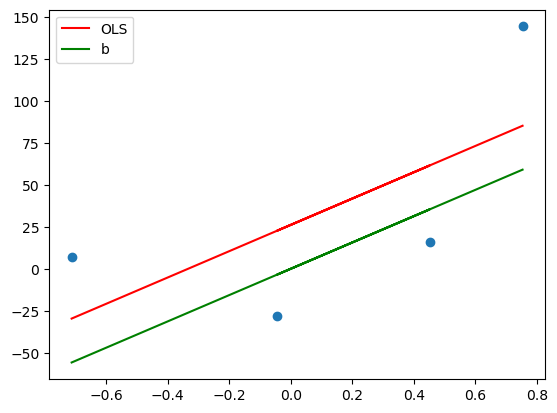

In [12]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='green', label='b')
plt.legend()
plt.show()

In [14]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-209.27763408209216

In [15]:
# Let's take learning rate = 0.1
lr = 0.1
step_size = loss_slope*lr
step_size

-20.927763408209216

In [16]:
# calculating new intercept
b = b - step_size
b

20.927763408209216

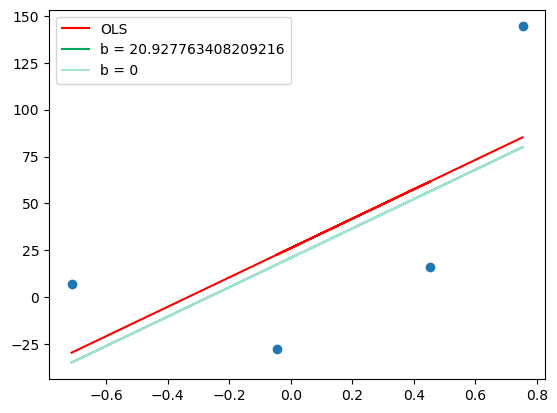

In [17]:
y_pred1 = ((78.35*X)+b).reshape(4)

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred1, color='#00a65a', label='b = {}'.format(b))
plt.plot(X, y_pred1, color='#A3E4D7', label='b = 0')
plt.legend()
plt.show()

In [18]:
# iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [19]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [20]:
b = b - step_size
b

25.11331608985106

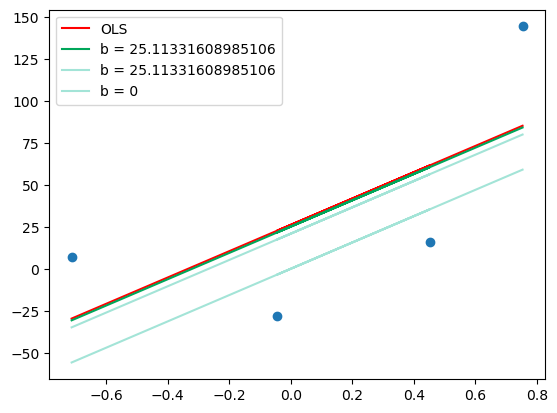

In [21]:
y_pred2 = ((78.35*X)+b).reshape(4)

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred2, color='#00a65a', label='b = {}'.format(b))
plt.plot(X, y_pred1, color='#A3E4D7', label='b = {}'.format(b))
plt.plot(X, y_pred, color='#A3E4D7', label='b = 0')
plt.legend()
plt.show()

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X, y = make_regression (n_samples=100, n_features=1, n_targets=1, n_informative=1, noise=20)

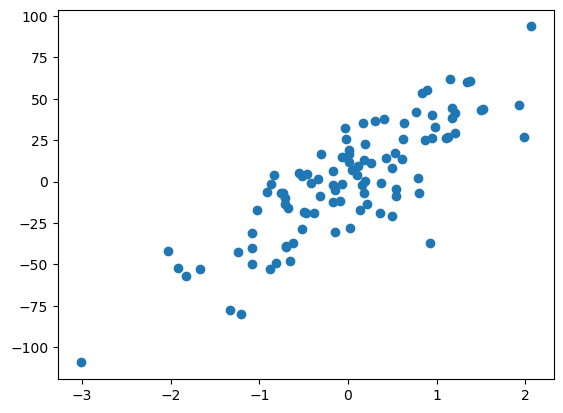

In [3]:
plt.scatter(X, y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[32.12598148]
0.7634635302977566


In [24]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3490207138914502

In [7]:
## np.mean(cross_val_score(lr, X, y, scoring='r2', cv=10))

0.546522065449223

In [25]:
m = 32.36

In [26]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120  # lets b = -30
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b) # loss_slope with respect to b
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.m)*X.ravel()) # loss_slope with respect to m
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
           # print(loss_slope_b, self.b)
        print(self.m, self.b)

    def predict(self, X):
         return self.m*X + self.b

In [27]:
gd = GDRegressor(0.001, 100)

In [28]:
gd.fit(X_train, y_train)

34.912428951023955 0.9713721002442478


In [29]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.29841297266734734

In [ ]:
np.mean(cross_val_score(lr, X, y, scoring='r2', cv=10))

In [17]:
# gd.predict(X)
np.mean(cross_val_score(gd, X, y, scoring='r2', cv=10)) # we got error because in our notebook some skitlearn method is not present 

TypeError: Cannot clone object '<__main__.GDRegressor object at 0x000001A8BD56E750>' (type <class '__main__.GDRegressor'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.